# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, EstType)
from lib import (stack, fpoints, fcurve, perform_est)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
nsample = 1000

def comparison(φ_vals, σ, ylim, *params):
    title = "AR(p) Comparison Plot"
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR, *params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    return scan

## Simulations

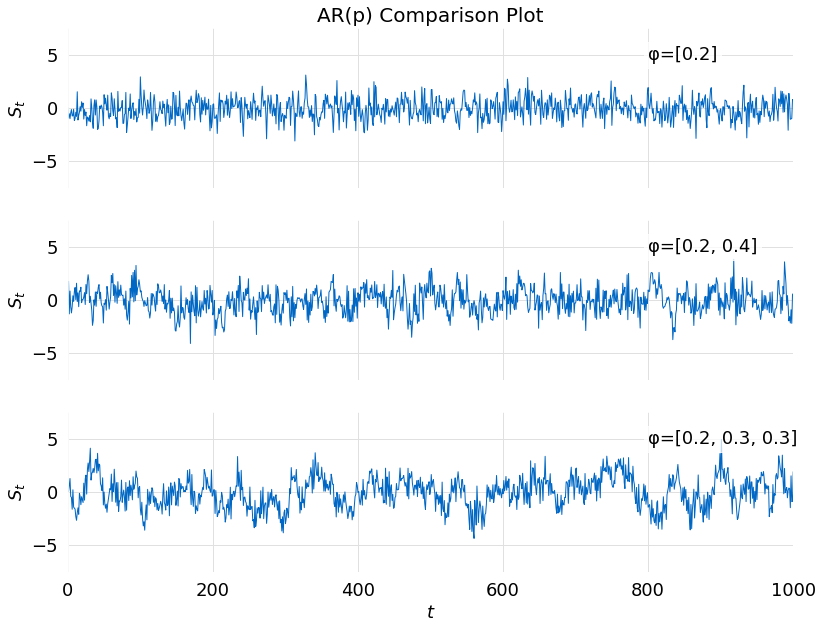

In [3]:
σ = 1.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-7.5, 7.5], *params)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [4]:
df = DataFunc.apply_func_type(ar[0], DataType.PACF, nlags=1)
df["PACF"][1]

0.19384839759774813

In [5]:
results = perform_est(ar[0], EstType.AR, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1360.357
Date:                Mon, 30 May 2022   AIC                           2726.713
Time:                        10:30:11   BIC                           2741.439
Sample:                             0   HQIC                          2732.310
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0510      0.037     -1.381      0.167      -0.123       0.021
ar.L1          0.1938      0.030      6.409      0.000       0.135       0.253
sigma2         0.8870      0.039     22.545      0.000       0.810       0.964
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.83   Prob(JB):                         0.94
Heteroskedasticity (H):               0.92   Skew:                             0.02
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
ar[0].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 1.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': {'Estimate': -0.05099527149001148,
     'Error': 0.03693328339285779,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.19380592661009913,
      'Error': 0.030237770656172214,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 0.8869818763179593,
     'Error': 0.039342875566680896,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma^2}}$'}}},
  'Tests': {}},
 'Date': '30/05/2022 10:30:11',
 'Name': 'AR(1)-Simulation-995c1021-8393-40c8-9066-25b57443828c',
 'SourceSchema': None,
 'Schema': DataSchema(xcol=(Time)

### AR(2) Example $\varphi = [0.2, 0.4]$

In [7]:
df = DataFunc.apply_func_type(ar[1], DataType.PACF, nlags=2)
df["PACF"][1:3]

2    0.406296
Name: PACF, dtype: float64

In [8]:
results = perform_est(ar[1], EstType.AR, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1436.438
Date:                Mon, 30 May 2022   AIC                           2880.875
Time:                        10:30:11   BIC                           2900.510
Sample:                             0   HQIC                          2888.337
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0754      0.079     -0.956      0.339      -0.230       0.079
ar.L1          0.1850      0.027      6.742      0.000       0.131       0.239
ar.L2          0.4069      0.029     14.188      0.000       0.351       0.463
sigma2         1.0322      0.047     22.171      0.000       0.941       1.123
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.65   Prob(JB):                         0.98
Heteroskedasticity (H):               1.07   Skew:                            -0.01
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ar[1].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Type': <EstType.AR: 'AR'>,
    'Const': {'Estimate': -0.0754137665842373,
     'Error': 0.07884436088679429,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18496450830099456,
      'Error': 0.02743636704273004,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.4068603199236586,
      'Error': 0.028677284907313846,
      'Estimate Label': '$\\hat{\\phi_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{1}}}$'}],
    'Sigma2': {'Estimate': 1.0321668490148834,
     'Error': 0.04655577347875885,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma^2}

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [10]:
df = DataFunc.apply_func_type(ar[2], DataType.PACF, nlags=3)
df["PACF"][1:4]

2    0.329489
3    0.299711
Name: PACF, dtype: float64

In [11]:
results = perform_est(ar[2], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1401.171
Date:                Mon, 30 May 2022   AIC                           2812.342
Time:                        10:30:11   BIC                           2836.886
Sample:                             0   HQIC                          2821.670
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0484      0.202     -0.240      0.810      -0.443       0.347
ar.L1          0.2158      0.031      6.965      0.000       0.155       0.277
ar.L2          0.3293      0.030     10.843      0.000       0.270       0.389
ar.L3          0.2996      0.030      9.983      0.000       0.241       0.358
sigma2         0.9613      0.046     20.826      0.000       0.871       1.052
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 5.18
Prob(Q):                              0.54   Prob(JB):                         0.08
Heteroskedasticity (H):               1.07   Skew:                             0.13
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ar[2].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 1.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': {'Estimate': -0.048413270792566354,
     'Error': 0.20156674082191972,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.21584837871976492,
      'Error': 0.030988377568724097,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.32932730302090585,
      'Error': 0.030372552091175814,
      'Estimate Label': '$\\hat{\\phi_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{1}}}$'},
     {'Estimate': 0.2996131818348938,
      'Error': 0.03001160525948812,
      'Estimate Label': '$\\hat{\\phi_{2}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{

## Simulations $\sigma = 5.0$

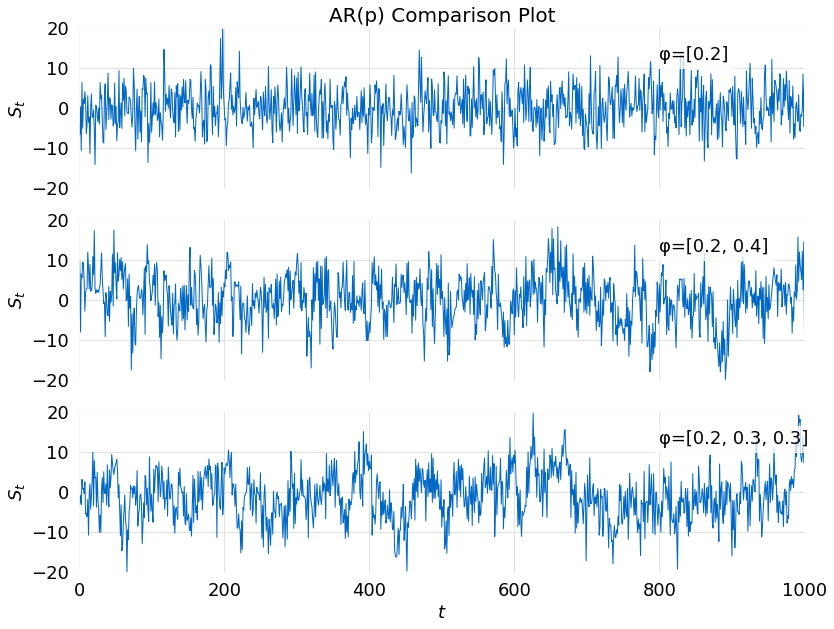

In [13]:
σ = 5.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-20.0, 20.0], *params)

### AR(1) Example ($\varphi = 0.2$)

In [14]:
df = DataFunc.apply_func_type(ar[0], DataType.PACF, nlags=1)
df["PACF"][1]

0.1612289938756462

In [15]:
results = perform_est(ar[0], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3053.288
Date:                Mon, 30 May 2022   AIC                           6116.576
Time:                        10:30:12   BIC                           6141.120
Sample:                             0   HQIC                          6125.904
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0725      0.199      0.365      0.715      -0.317       0.462
ar.L1          0.1585      0.033      4.858      0.000       0.095       0.222
ar.L2          0.0156      0.033      0.468      0.639      -0.050       0.081
ar.L3          0.0114      0.030      0.385      0.700      -0.047       0.069
sigma2        26.1162      1.180     22.141      0.000      23.804      28.428
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.99   Prob(JB):                         0.43
Heteroskedasticity (H):               1.10   Skew:                             0.10
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
ar[0].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': {'Estimate': 0.07252117905547743,
     'Error': 0.1988398022448907,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.15850590857940147,
      'Error': 0.03262612949957472,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.015584031982634005,
      'Error': 0.033268403846690935,
      'Estimate Label': '$\\hat{\\phi_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{1}}}$'},
     {'Estimate': 0.011396672985121052,
      'Error': 0.029624149189256363,
      'Estimate Label': '$\\hat{\\phi_{2}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{2}}}$'}],


### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [17]:
df = DataFunc.apply_func_type(ar[1], DataType.PACF, nlags=2)
df["PACF"][1:3]

2    0.441892
Name: PACF, dtype: float64

In [18]:
results = perform_est(ar[1], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3056.185
Date:                Mon, 30 May 2022   AIC                           6122.371
Time:                        10:30:12   BIC                           6146.915
Sample:                             0   HQIC                          6131.699
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2253      0.474      0.475      0.635      -0.704       1.155
ar.L1          0.1872      0.032      5.896      0.000       0.125       0.249
ar.L2          0.4392      0.028     15.516      0.000       0.384       0.495
ar.L3          0.0313      0.032      0.989      0.323      -0.031       0.093
sigma2        26.2537      1.204     21.798      0.000      23.893      28.614
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.99   Prob(JB):                         0.82
Heteroskedasticity (H):               0.90   Skew:                            -0.01
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar[1].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': {'Estimate': 0.22528469330470619,
     'Error': 0.4741909706643307,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18722324687350717,
      'Error': 0.03175665015033256,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.43924475130679996,
      'Error': 0.02830929643038037,
      'Estimate Label': '$\\hat{\\phi_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{1}}}$'},
     {'Estimate': 0.0312542408922921,
      'Error': 0.03160537515624071,
      'Estimate Label': '$\\hat{\\phi_{2}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{2}}}$'}],


### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [20]:
df = DataFunc.apply_func_type(ar[2], DataType.PACF, nlags=3)
df["PACF"][1:4]

2    0.284433
3    0.251307
Name: PACF, dtype: float64

In [21]:
results = perform_est(ar[2], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2997.065
Date:                Mon, 30 May 2022   AIC                           6004.131
Time:                        10:30:12   BIC                           6028.675
Sample:                             0   HQIC                          6013.459
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9726      0.638     -1.524      0.127      -2.223       0.278
ar.L1          0.2187      0.032      6.872      0.000       0.156       0.281
ar.L2          0.2850      0.031      9.268      0.000       0.225       0.345
ar.L3          0.2553      0.033      7.683      0.000       0.190       0.320
sigma2        23.3239      1.030     22.652      0.000      21.306      25.342
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.86
Prob(Q):                              0.81   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.14
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar[2].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 5.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': {'Estimate': -0.9725589816222617,
     'Error': 0.6380640599454637,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.2187181816333189,
      'Error': 0.03182636417087758,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.2850278736930276,
      'Error': 0.030752766056156382,
      'Estimate Label': '$\\hat{\\phi_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{1}}}$'},
     {'Estimate': 0.25531871315338317,
      'Error': 0.03323229957323349,
      'Estimate Label': '$\\hat{\\phi_{2}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{2}}}$